# Python语言与经济大数据分析

# 第7_3讲 数据可视化入门:matplotlib

#郭峰（上海财经大学投资系）
#Email：guo.feng@mail.sufe.edu.cn
#2019-02-20
#本讲目录
#7_3_1 基本画图工具
#7_3_2 回归图
#7_3_3 词云

# 7_3_1 基本画图工具

In [ ]:
#matplotlib库和seaborn库
#matplotlib是python图形显示的主要库
#import matplotlib.pyplot as plt
#seaborn 是基于matplotlib的加强版,更少的设置，更美观的显示,默认情况下就能创建赏心悦目的图表
#import seaborn as sns
#安装：pip install seaborn
#学习资料：https://zhuanlan.zhihu.com/p/24464836

In [8]:
#先引入一个aqi的数据
import pandas as pd
path='D:/python/郭峰Python讲义/数据与结果/' 
f = open(path+"aqi.csv",encoding='utf8')
aqis= pd.read_csv(f,header=0,sep=',')
aqis['date'] = pd.to_datetime(aqis['date'])
print(aqis[1:20])


         date    aqi
1  2014-01-02  158.0
2  2014-01-03   74.0
3  2014-01-04  165.0
4  2014-01-05  113.0
5  2014-01-06  190.0
6  2014-01-07  122.0
7  2014-01-08   32.0
8  2014-01-09   49.0
9  2014-01-10   95.0
10 2014-01-11  159.0
11 2014-01-12   52.0
12 2014-01-13  117.0
13 2014-01-14  113.0
14 2014-01-15  180.0
15 2014-01-16  403.0
16 2014-01-17  209.0
17 2014-01-18  113.0
18 2014-01-19  149.0
19 2014-01-20   33.0


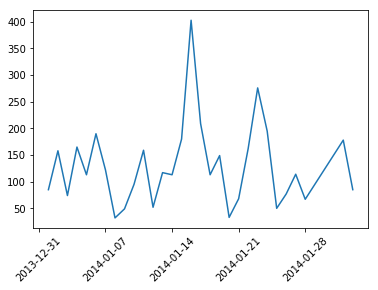

In [9]:
#折线图
import matplotlib.pyplot as plt
%matplotlib inline
#Using the different pyplot functions, we can create, customize, and display a plot. For example, we can use 2 functions to :
#plt.plot()
#plt.show()
first_30 = aqis[0:30]
plt.plot(first_30['date'], first_30['aqi'])   #只画前30个
#lt.plot(aqis['date'], aqis['aqi'])
plt.xticks(rotation=45)     #由于x轴过于紧凑，所以使用旋转x轴的方法 
plt.show()

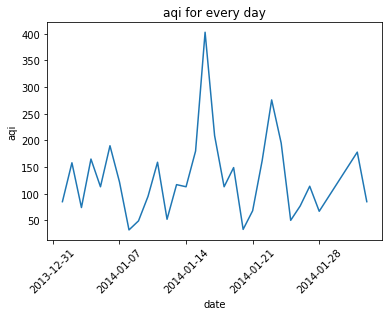

In [10]:
#设置x轴和y轴
import matplotlib.pyplot as plt
%matplotlib inline
first_30 = aqis[0:30]
plt.plot(first_30['date'], first_30['aqi'])   #只画前30个
plt.xticks(rotation=45)     #由于x轴过于紧凑，所以使用旋转x轴的方法 
plt.xlabel('date')          #设置x轴y轴说明
plt.ylabel('aqi')
plt.title('aqi for every day')   #标题
plt.show()

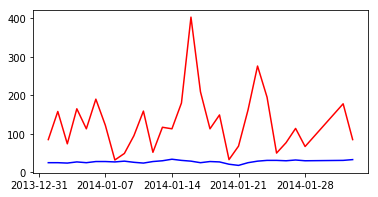

In [21]:
#一个图多个曲线
import pandas as pd
path='D:/python/郭峰Python讲义/数据与结果/' 
f = open(path+"aqi.csv",encoding='utf8')
aqis= pd.read_csv(f,header=0,sep=',')

aqis['date'] = pd.to_datetime(aqis['date'])

fig = plt.figure(figsize=(6,3))

plt.plot(aqis[0:30]['date'], aqis[0:30]['aqi'], c='red')
plt.plot(aqis[0:30]['date'], aqis[0:30]['temph'], c='blue')
plt.show()


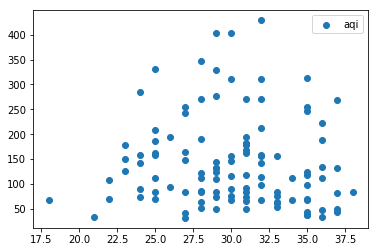

In [22]:
#散点图
import matplotlib.pyplot as plt
import random
plt.scatter(aqis['temph'], aqis['aqi'], label='aqi')
plt.legend()
plt.show()

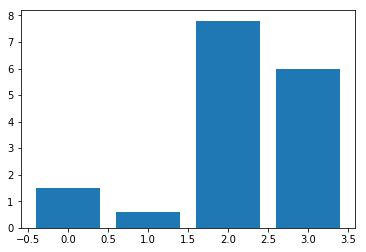

In [29]:
#柱状图
import matplotlib.pyplot as plt  
num_list = [1.5,0.6,7.8,6]  
plt.bar(range(len(num_list)), num_list)  
plt.show()  

date
2014-01-02    158.0
2014-01-03     74.0
2014-01-04    165.0
2014-01-05    113.0
2014-01-06    190.0
2014-01-07    122.0
2014-01-08     32.0
2014-01-09     49.0
2014-01-10     95.0
Name: aqi, dtype: float64


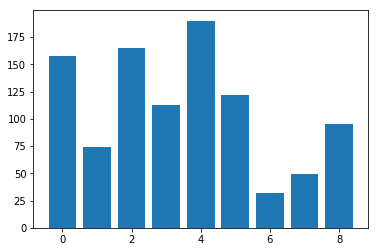

In [30]:
# 柱状图，还是aqi的例子。
import pandas as pd
%matplotlib inline   
import matplotlib.pyplot as plt
path='D:/python/郭峰Python讲义/数据与结果/' 
f = open(path+"aqi.csv",encoding='utf8')
aqis= pd.read_csv(f,header=0,sep=',')
aqis['date'] = pd.to_datetime(aqis['date'])

aqis=aqis.set_index('date')
print(aqis.aqi[1:10])
plt.bar(range(len(aqis.aqi[1:10])),aqis.aqi[1:10])
plt.show()


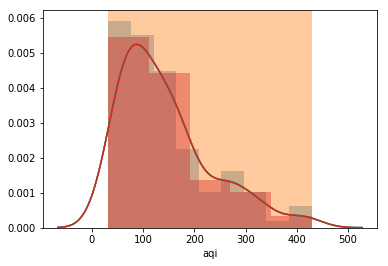

In [34]:
#直方图
#seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易
#在大多数情况下使用seaborn就能做出很具有吸引力的图。
import pandas as pd
import seaborn as sns
%matplotlib inline   
import matplotlib.pyplot as plt
path='D:/python/郭峰Python讲义/数据与结果/' 
f = open(path+"aqi.csv",encoding='utf8')
aqis= pd.read_csv(f,header=0,sep=',')
aqis['date'] = pd.to_datetime(aqis['date'])
aqis=aqis.set_index('date')
x=aqis.aqi
sns.distplot(x)
sns.distplot(x,kde=False)  #不要拟合曲线，ture或默认为要
sns.distplot(x,hist=False)  #不要柱子，True或默认为要
sns.distplot(x,bins=5)      #多少个柱子

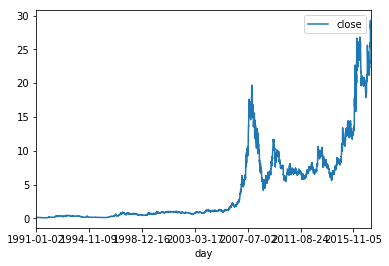

In [37]:
#折线图,周耿提供的例子
%matplotlib inline    
import pandas as pd
def s2day2(s):
    a=s.split('/')
    if len(a[1])<2:
        a[1]='0'+a[1]
    if len(a[2])<2:
        a[2]='0'+a[2]  
    s='-'.join(a)
    return s
path='D:/python/郭峰Python讲义/数据与结果/' 
f2 = open(path+"wanke.csv",encoding='utf8')
wanke= pd.read_csv(f2,header=0,sep=',')
wanke['day']=wanke.date.apply(s2day2)
wanke=wanke.set_index('day')
wanke=wanke.sort_index()
wanke.plot(y='close')
#print(df1)


In [40]:
#饼图
%matplotlib inline 
import tushare as ts  #这是直接从网站上获取股票数据
df1=ts.get_k_data('000002',start='2017-03-01',end='2018-04-04',ktype='W')
df1=df1.set_index('date')
df1['pct']=df1['close'].pct_change()
#df1.plot(kind='pie',y=['volume'],figsize=(10,10))
#散点图
df1.plot(x='close',y='volume',kind='scatter')


ModuleNotFoundError: No module named 'tushare'

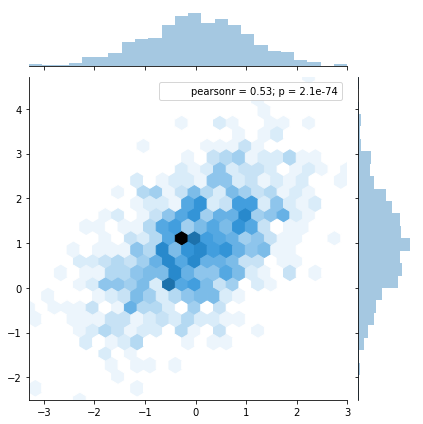

In [41]:
#六边形单元格散点图，周耿提供的例子，没看懂
import numpy as np
import  seaborn as sns
mean, cov = [0, 1], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind="hex")
#sns.jointplot(x=x, y=y, kind="kde")
#sns.jointplot(x=x, y=y, kind="reg")


In [42]:
#气泡图
import tushare as ts
import matplotlib.pyplot as plt
df1=ts.get_k_data('000002',start='2018-03-01',end='2018-04-04')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df1.index, df1['close'], s=df1['volume']/5000)  # 第三个变量表明根据“交易量”（？）气泡的大小
plt.show()


ModuleNotFoundError: No module named 'tushare'

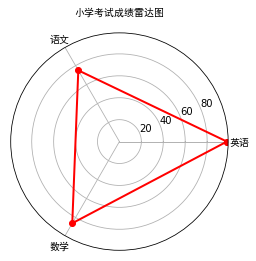

In [43]:
#雷达图
import numpy as np
import matplotlib.pyplot as plt
#标签
labels = np.array(['英语','语文','数学'])
dataLenth = 3 #数据个数
data = np.array([98,75,86]) #数据
angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
data = np.concatenate((data, [data[0]])) 
angles = np.concatenate((angles, [angles[0]]))  
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, data, 'ro-', linewidth=2)
ax.set_thetagrids(angles * 180/np.pi, labels, fontproperties="SimHei")
ax.set_title("小学考试成绩雷达图", va='bottom', fontproperties="SimHei")
ax.grid(True)
plt.show()


# 7_3_2 回归图

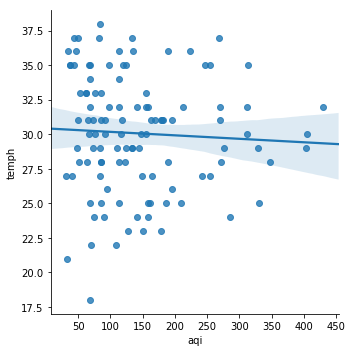

In [45]:
#lmplot是一种集合基础绘图与基于数据建立回归模型的绘图方法。
#旨在创建一个方便拟合数据集回归模型的绘图方法，利用'hue'、'col'、'row'参数来控制绘图变量。
#学习资料：https://zhuanlan.zhihu.com/p/25909753
import seaborn as sns
import pandas as pd
%matplotlib inline 
#tips = sns.load_dataset("tips")
#sns.lmplot("total_bill", "tip", tips, col="smoker");

path='D:/python/郭峰Python讲义/数据与结果/' 
f = open(path+"aqi.csv",encoding='utf8')
aqis= pd.read_csv(f,header=0,sep=',')

aqis['date'] = pd.to_datetime(aqis['date'])

aqis=aqis.set_index('date')
sns.lmplot("aqi", "temph", aqis)

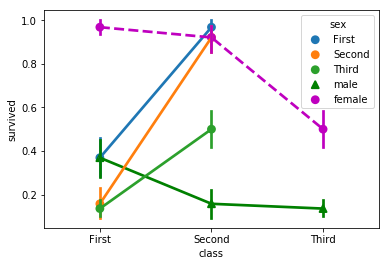

In [46]:
#以下这些下载数据识别，具体可参阅周耿的讲义
import  seaborn as sns
titanic = sns.load_dataset("titanic")
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)
sns.pointplot(x="class", y="survived", hue="sex", data=titanic, palette={"male": "g", "female": "m"}, markers=["^", "o"], linestyles=["-", "--"])


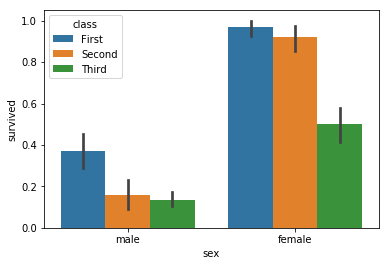

In [47]:
import  seaborn as sns
titanic = sns.load_dataset("titanic")
sns.barplot(x="sex", y="survived", hue="class", data=titanic)


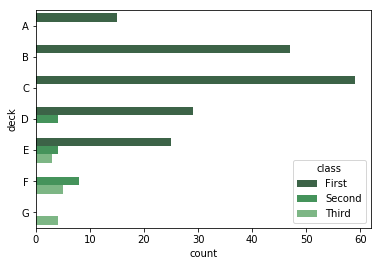

In [48]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d")

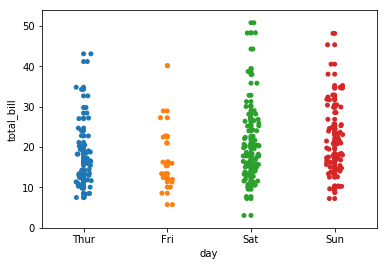

In [51]:
import seaborn as sns
tips=sns.load_dataset("tips")
sns.stripplot(x="day", y="total_bill", data=tips)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)


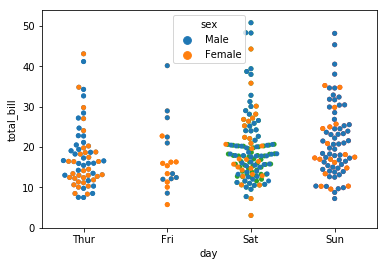

In [52]:
import seaborn as sns
tips=sns.load_dataset("tips")
sns.swarmplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)


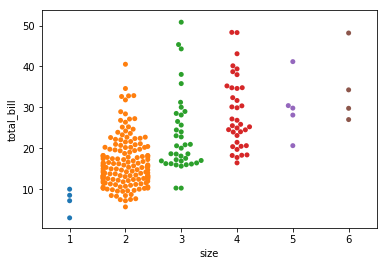

In [53]:
sns.swarmplot(x="size", y="total_bill", data=tips)



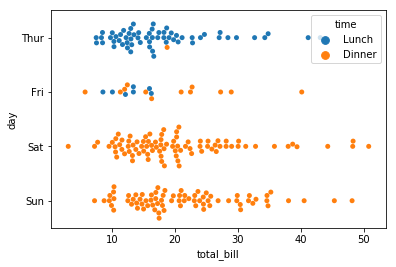

In [54]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips)

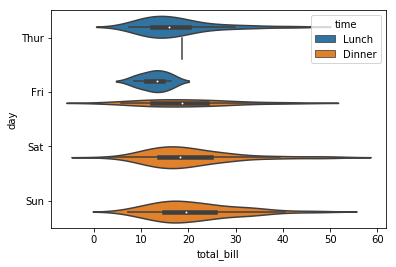

In [55]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)



ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "D:\python\WinPython-64bit-3.6.2.0Qt5\python-3.6.2.amd64\lib\site-packages\lml\utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


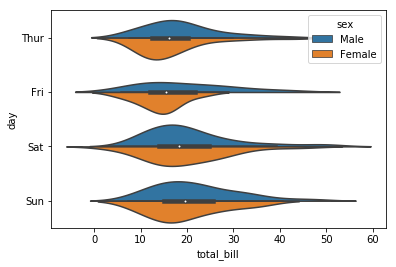

In [57]:
sns.violinplot(x="total_bill", y="day", hue="sex", data=tips, split=True)


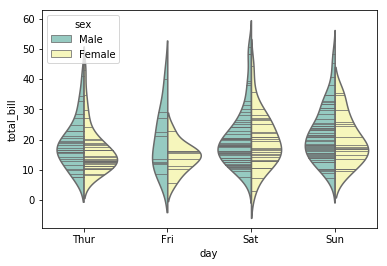

In [58]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,  split=True, inner="stick", palette="Set3")


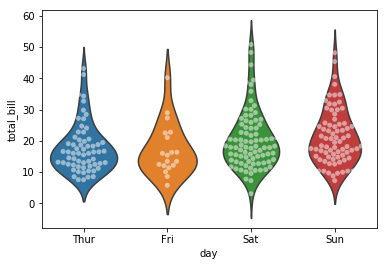

In [60]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)



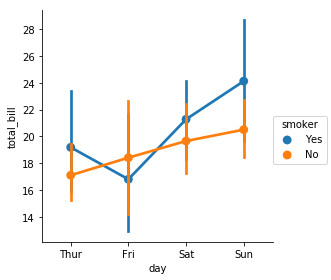

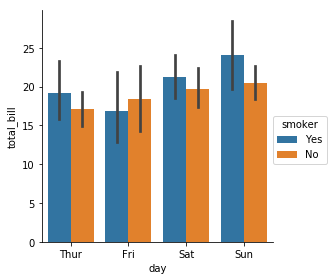

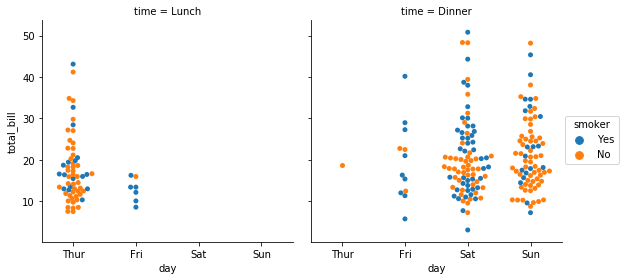

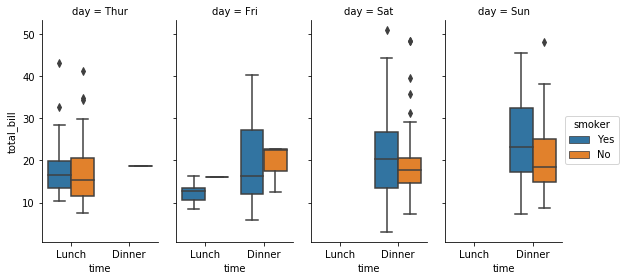

In [61]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips)
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar")
sns.factorplot(x="day", y="total_bill", hue="smoker", col="time", data=tips, kind="swarm")
sns.factorplot(x="time", y="total_bill", hue="smoker", col="day", data=tips, kind="box", size=4, aspect=.5)


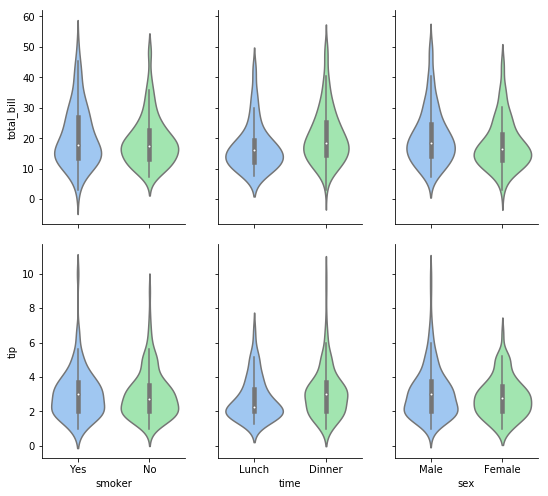

In [62]:
g = sns.PairGrid(tips, x_vars=["smoker", "time", "sex"], y_vars=["total_bill", "tip"], aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel")


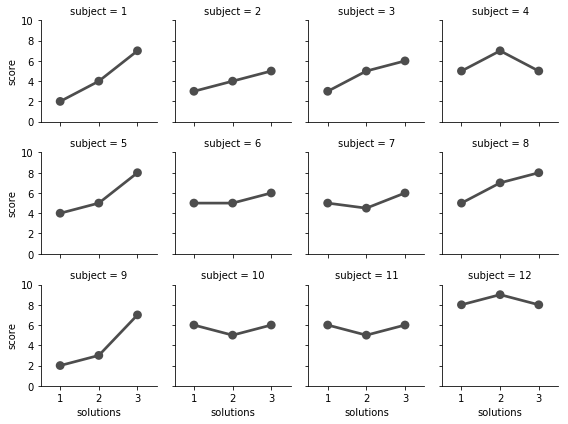

In [63]:
attend = sns.load_dataset("attention").query("subject <= 12")
g = sns.FacetGrid(attend, col="subject", col_wrap=4, size=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", color=".3", ci=None);


# 7_3_3 词云

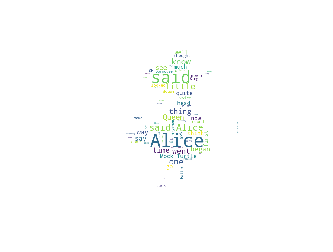

In [69]:
#英语词云
from wordcloud import WordCloud , ImageColorGenerator 
import matplotlib.pyplot as plt 
from scipy.misc import imread 
path='D:/python/郭峰Python讲义/数据与结果/' 
text = open(path+'Alice.txt','r',encoding='utf8').read() #读取一个txt文件 
bg_pic = imread('alice_mask.png') #读入背景图片 
wordcloud = WordCloud(mask=bg_pic,background_color='white',scale=1.5).generate(text) #生成词云
image_colors = ImageColorGenerator(bg_pic)
plt.imshow(wordcloud) #显示词云图片
plt.axis('off') 
plt.show() 
#wordcloud.to_file('test.jpg') #保存图片 
